In [176]:
#Data Prep
import numpy as np
import pandas as pd
#Data Viz
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
#Principal Components Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format}) 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df = pd.read_csv("kenpom_all.csv")
df2 = df[(df['Team'] != "2013 Florida Gulf Coast") & (df['Team'] != "2011 VCU")].reset_index()
df2.shape

(1180, 35)

In [177]:
df2.columns

Index(['index', 'Team', 'Finish', 'TourneyWins', 'Result', 'Seed', 'Tempo',
       'AdjTempo', 'OE', 'AdjOE', 'DE', 'AdjDE', 'AdjEM', 'eFGPct', 'TOPct',
       'ORPct', 'FTRate', 'OppeFGPct', 'OppTOPct', 'OppORPct', 'OppFTRate',
       'FG2Pct', 'FG3Pct', 'FTPct', 'BlockPct', 'OppFG2Pct', 'OppFG3Pct',
       'OppFTPct', 'OppBlockPct', 'FG3Rate', 'OppFG3Rate', 'ARate', 'OppARate',
       'StlRate', 'OppStlRate'],
      dtype='object')

In [178]:
model_df = df2[['Team', 'Finish', 
                'AdjOE', 'eFGPct', 'FG2Pct', 'FG3Pct', 
                'OppeFGPct', 'OppFG2Pct', 'OppFG3Pct', 
                'ORPct', 'OppORPct', 'TOPct', 'OppFTRate']]

# PCA

In [179]:
def heatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

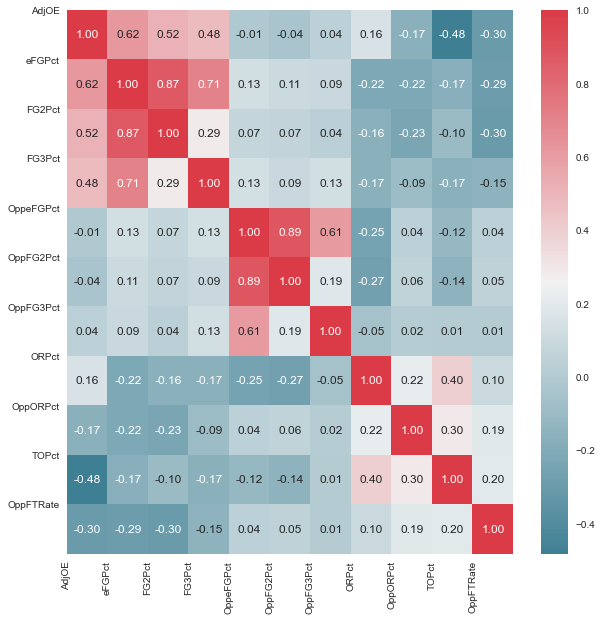

In [180]:
pca_df = model_df.iloc[:,2:14]
heatMap(pca_df)

In [181]:
def prin_comp(df):
    sc = StandardScaler()
    shape = df.shape
    #Fit principal components
    np.random.seed(123)
    x = sc.fit_transform(df)
    pca = PCA(n_components=shape[1])
    x_pca = pca.fit_transform(x)
    #Eigenvalues
    eig = abs(pca.components_)
    #Amount of variance explained
    var = np.round(pca.explained_variance_ratio_, decimals=4)*100
    #Cumulative variance explained
    var_total = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    print('Eigenvalues: \n%s' %eig)
    print('\nVariance explained by component: \n%s' %var)
    print('\nCumulative variance explained by component: \n%s' %var_total)
    #Plot propotion of explained variance
    plt.plot(var_total)
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.show()

Eigenvalues: 
[[0.3982 0.4976 0.4194 0.3746 0.1809 0.1539 0.1179 0.1962 0.2010 0.2687
  0.2371]
 [0.2240 0.1165 0.1417 0.0411 0.6165 0.5513 0.3782 0.2119 0.1199 0.0119
  0.1673]
 [0.1486 0.2262 0.1741 0.2214 0.0887 0.0205 0.2419 0.5301 0.4497 0.5273
  0.1390]
 [0.4721 0.2833 0.3397 0.0638 0.0920 0.0757 0.3348 0.4556 0.0060 0.4615
  0.1749]
 [0.2094 0.0293 0.2026 0.3465 0.0759 0.1633 0.4385 0.0773 0.4028 0.3369
  0.5365]
 [0.0743 0.0471 0.1500 0.3200 0.0916 0.3846 0.4757 0.1200 0.4044 0.0177
  0.5536]
 [0.1738 0.0199 0.2936 0.3889 0.1124 0.2680 0.2328 0.3841 0.4824 0.0108
  0.4614]
 [0.0931 0.0496 0.4189 0.5236 0.0800 0.2644 0.2933 0.2550 0.4267 0.2683
  0.2406]
 [0.6764 0.1739 0.2000 0.1507 0.0145 0.0198 0.0257 0.4410 0.0487 0.5005
  0.0295]
 [0.0231 0.7211 0.5163 0.3486 0.2178 0.1829 0.0988 0.0245 0.0034 0.0118
  0.0009]
 [0.0024 0.2264 0.1629 0.1133 0.7000 0.5622 0.3213 0.0030 0.0056 0.0005
  0.0029]]

Variance explained by component: 
[29.7800 20.2500 12.6100 8.7000 8.1500 7.4300 6.

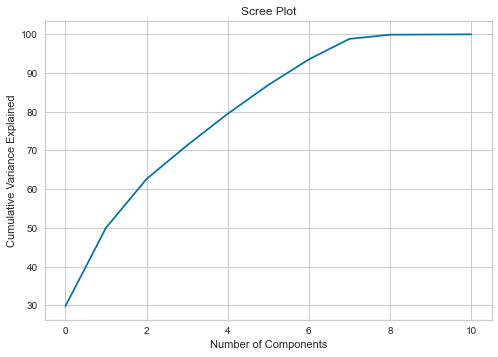

In [182]:
prin_comp(pca_df)

In [183]:
#This needs to be done more efficiently
sc = StandardScaler()
shape = pca_df.shape
x = sc.fit_transform(pca_df)
pca = PCA(n_components=shape[1])
x_pca = pca.fit_transform(x)
x_full = pd.DataFrame(x_pca)
x_reduced = x_full.loc[:,0:5]
x_reduced.columns = ['O_Shooting', 'D_Shooting', 'Rebounding', 'O_Efficiency', 'D_FT_Rate', 'D_Efficiency']

# Hierarchical Clustering

In [184]:
hier_X = x_reduced

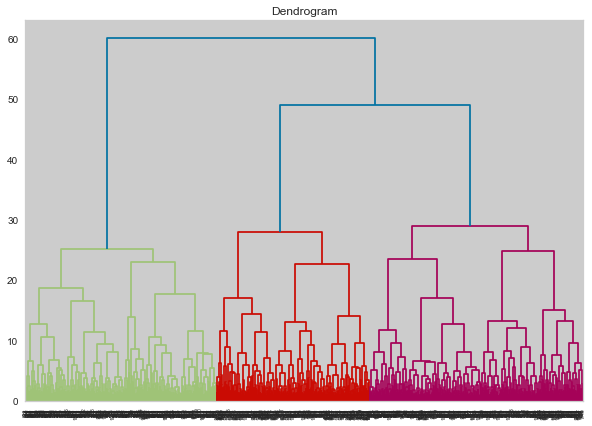

In [185]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(hier_X, method='ward'))

In [186]:
hier5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hier5.fit_predict(hier_X)

array([0, 2, 0, ..., 0, 4, 3], dtype=int64)

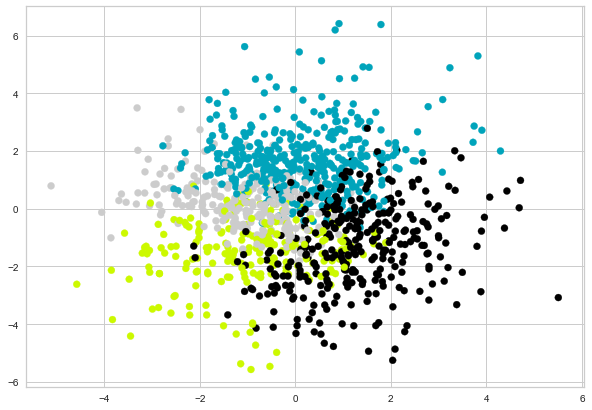

In [187]:
plt.figure(figsize=(10, 7))
plt.scatter(hier_X.iloc[:,1], hier_X.iloc[:,0], c=hier4.labels_, cmap='nipy_spectral')

In [188]:
df3 = pd.DataFrame(hier5.labels_)
model_df.insert(2, 'Cluster', df3[0])
model_df.insert(3, 'AdjEM', df2['AdjEM'])
model_df.insert(5, 'AdjDE', df2['AdjDE'])

In [190]:
pd.crosstab(index=model_df["Finish"], columns=model_df["Cluster"])

Cluster,0,1,2,3,4
Finish,,,,,
1. Champion,2,5,9,0,1
2. Runner Up,3,4,6,0,4
3. Final Four,7,11,11,0,4
4. Elite Eight,9,24,23,5,7
5. Sweet 16,31,36,29,18,21
6. Second Round,91,69,56,31,25
7. First Round,251,76,71,136,54
8. 2021,10,11,11,10,8


# Cluster 2: Tier 1 Contenders

In [191]:
model_df[(model_df['Finish']=='8. 2021') & (model_df['Cluster']==2)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
1133,2021 Baylor,8. 2021,2,31.8016,119.2860,87.4840,59.0199,55.8621,42.7509,46.0899,46.2312,30.5419,38.6667,27.5064,16.6901,29.9501
1137,2021 Creighton,8. 2021,2,23.9943,116.5330,92.5389,58.2667,58.3133,38.8060,46.0474,43.3054,33.8078,24.8768,28.7474,15.5613,25.4282
1139,2021 Florida,8. 2021,2,17.5498,111.8830,94.3331,53.3589,50.9972,38.8235,48.1445,43.8235,37.7907,32.2259,28.8820,19.8955,38.2812
1140,2021 Florida St.,8. 2021,2,19.7928,113.0910,93.2986,53.7815,52.5597,37.1585,47.4725,43.6567,35.2941,34.3396,29.3706,18.8389,34.2857
1141,2021 Gonzaga,8. 2021,2,32.1049,123.6610,91.5561,60.7438,65.0602,34.2105,48.7374,46.9548,34.6290,35.2668,23.8095,15.3636,30.8081
1143,2021 Illinois,8. 2021,2,24.6464,116.0550,91.4084,57.8674,56.1205,41.1765,45.6907,44.7217,31.7164,33.9806,20.6693,18.6794,30.6717
1145,2021 Iowa,8. 2021,2,27.3833,123.4830,96.0998,56.7442,55.2529,39.3064,48.1439,45.3668,34.8837,34.1564,31.5693,13.4836,21.6937
1149,2021 LSU,8. 2021,2,20.2752,118.0300,97.7546,56.6109,57.7889,36.5385,46.7599,51.3736,27.6190,34.7107,31.3636,18.6616,30.3387
1151,2021 Michigan,8. 2021,2,27.2209,117.5300,90.3093,58.9922,60.6715,37.2807,43.2336,38.2883,34.4961,30.6502,24.3363,17.6749,21.5100
1163,2021 Saint Louis,8. 2021,2,18.1345,110.9500,92.8154,56.8089,54.9575,41.0072,47.2356,45.9770,32.9032,38.1323,22.8782,17.8806,41.1058


In [193]:
model_df[(model_df['Finish']=='1. Champion') & (model_df['Cluster']==2)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
164,2005 North Carolina,1. Champion,2,32.0028,121.0550,89.0521,56.0398,54.1004,40.3202,46.3940,43.6806,34.0528,39.7024,31.5068,20.9913,30.2990
208,2006 Florida,1. Champion,2,23.9172,116.0230,92.1054,56.8900,55.8611,39.2130,45.0088,43.6887,31.8367,35.5252,33.0695,20.6755,29.3728
272,2007 Florida,1. Champion,2,28.8619,120.9270,92.0656,59.5929,58.7234,40.8528,45.2019,46.2998,28.5319,37.6196,28.1303,20.7312,27.7464
347,2008 Kansas,1. Champion,2,33.9647,121.4330,87.4681,56.5912,55.3672,39.6970,44.2642,41.1852,32.8162,37.7628,28.7832,19.1079,31.0329
425,2009 North Carolina,1. Champion,2,28.5574,122.6450,94.0872,52.8395,51.0169,38.4848,46.5532,44.6506,33.6283,38.8848,31.6722,16.4854,25.3738
803,2015 Duke,1. Champion,2,29.3074,124.2530,94.9453,56.6180,55.9287,38.6612,46.5366,46.2985,31.4376,35.7717,30.1621,16.2675,24.0245
959,2017 North Carolina,1. Champion,2,28.0091,122.0750,94.0654,51.6543,50.9771,35.4756,48.1026,46.3068,33.9188,41.2517,24.9827,16.2325,31.5653
1055,2018 Villanova,1. Champion,2,31.4091,127.3840,95.9749,59.5082,58.9704,40.0691,48.4798,48.9955,31.7016,29.5699,27.0963,15.0455,26.6972
1124,2019 Virginia,1. Champion,2,35.6526,123.6930,88.0404,55.1800,52.5342,39.4834,44.6867,45.6844,28.8915,30.3665,25.3640,14.7067,26.2657


In [194]:
model_df[(model_df['Finish']=='2. Runner Up') & (model_df['Cluster']==2)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
23,2003 Kansas,2. Runner Up,2,27.1016,114.0030,86.9009,52.6829,53.4790,33.3333,46.0191,42.1773,36.5964,39.5104,30.4803,20.0666,25.3412
250,2006 UCLA,2. Runner Up,2,22.2382,113.9480,91.7094,53.2226,53.9110,34.6041,45.8894,44.6332,32.8972,37.4363,31.0971,22.3082,31.6891
297,2007 Ohio St.,2. Runner Up,2,28.8677,119.3410,90.4737,53.7597,53.5354,36.1006,46.7085,44.5000,33.6134,34.7356,31.2432,17.2208,21.6301
891,2016 North Carolina,2. Runner Up,2,28.0379,121.1390,93.1009,52.5966,53.8913,32.7007,48.0922,44.6254,36.2353,40.6585,29.9270,15.3771,30.3983
939,2017 Gonzaga,2. Runner Up,2,33.0538,120.7110,87.6571,56.6418,56.3316,38.1842,41.1213,40.0246,28.9610,30.0000,26.1905,16.2242,26.9279
1117,2019 Texas Tech,2. Runner Up,2,26.7664,112.8260,86.0594,53.4834,52.7757,36.4954,43.0439,41.9488,29.7794,27.4958,28.6240,17.7525,36.6552


In [195]:
model_df[(model_df['Finish']=='3. Final Four') & (model_df['Cluster']==2)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
102,2004 Oklahoma St.,3. Final Four,2,24.7896,117.3590,92.5691,55.4921,55.5321,36.9048,46.1347,45.7708,31.3187,37.6276,31.9223,19.7699,35.2844
154,2005 Louisville,3. Final Four,2,24.7011,116.4890,91.7883,55.0785,51.5254,39.9767,44.7709,42.3047,32.6586,37.2131,31.2775,19.9048,37.0020
156,2005 Michigan St.,3. Final Four,2,25.6192,119.6080,93.9891,54.5576,55.2025,35.4943,48.8034,46.5695,35.4839,38.8520,29.5855,19.9357,37.9487
275,2007 Georgetown,3. Final Four,2,28.0911,121.2380,93.1473,56.9825,57.7666,37.0079,44.0568,43.2007,30.3155,40.2003,33.9489,21.9677,32.0930
311,2007 UCLA,3. Final Four,2,25.2454,116.1640,90.9188,53.5065,52.4730,37.0840,47.6376,45.7406,35.0806,33.4683,29.9323,18.4105,30.1834
359,2008 North Carolina,3. Final Four,2,28.1446,120.6860,92.5415,52.9641,52.1169,37.2414,48.1928,47.8022,32.6291,42.4359,28.7390,18.7287,25.7430
377,2008 UCLA,3. Final Four,2,30.5753,118.7350,88.1600,52.1729,52.2193,34.7009,46.4792,45.3810,32.9181,39.3429,27.7800,18.6199,25.5746
544,2011 Kentucky,3. Final Four,2,25.2715,117.7600,92.4889,52.3362,48.8482,39.7454,44.2413,42.4301,32.3575,33.5611,29.5389,16.1363,30.0731
894,2016 Oklahoma,3. Final Four,2,24.8490,117.2850,92.4357,54.3371,48.2183,42.1634,47.1910,45.3324,33.6970,31.2356,30.5364,18.2598,28.3492
966,2017 Oregon,3. Final Four,2,23.8276,117.7280,93.9002,55.4900,54.4915,38.0397,46.4174,46.1484,31.2426,32.3529,29.5471,17.0700,26.3017


# Cluster 1: Tier 2 Contenders

In [196]:
model_df[(model_df['Finish']=='8. 2021') & (model_df['Cluster']==1)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
1131,2021 Arizona,8. 2021,1,18.3215,113.7490,95.4279,51.0828,49.5345,36.2903,47.1311,47.3348,31.1787,37.1245,23.5669,16.4329,36.2022
1132,2021 Arkansas,8. 2021,1,17.9967,111.1980,93.2012,52.1493,52.1822,34.7339,46.0127,46.2302,30.4196,34.7490,24.0481,16.3050,31.5190
1135,2021 Colorado,8. 2021,1,22.0284,112.8760,90.8473,52.3179,50.4219,37.0107,46.9697,47.1579,31.0757,31.1475,23.8938,16.5289,25.2066
1142,2021 Houston,8. 2021,1,24.1028,112.7170,88.6147,47.4164,46.5649,32.4528,41.1496,42.3295,26.0204,40.3846,26.4198,18.1516,46.8978
1146,2021 Kansas,8. 2021,1,22.5453,112.6400,90.0948,49.8645,48.7288,34.5865,47.6584,46.5784,32.9670,35.0562,25.7271,18.2492,24.9311
1147,2021 Louisville,8. 2021,1,18.9851,111.0630,92.0780,52.9963,53.1165,35.1515,45.4628,45.0479,30.6723,30.4918,25.1969,19.4178,35.7532
1156,2021 Ohio St.,8. 2021,1,21.1715,116.2960,95.1244,51.0695,52.3385,32.7759,46.9456,44.7983,33.6879,33.0396,26.3485,14.6323,30.0133
1168,2021 Tennessee,8. 2021,1,24.6434,111.8740,87.2309,51.6978,51.4493,34.8571,44.8669,43.5065,31.1927,33.4302,24.4957,14.7265,27.1863
1169,2021 Texas,8. 2021,1,24.8014,113.8610,89.0593,51.9915,51.8160,34.8276,42.7650,43.1211,27.9621,32.7945,27.5574,19.1732,38.8252
1172,2021 USC,8. 2021,1,21.3234,111.6790,90.3556,52.9286,54.0881,33.6323,42.1582,39.0086,31.5603,35.6968,28.8577,18.3949,27.3458


In [198]:
model_df[(model_df['Finish']=='1. Champion') & (model_df['Cluster']==1)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
49,2003 Syracuse,1. Champion,1,19.9564,113.9510,93.9947,51.8639,51.9303,34.4444,44.2743,43.5583,30.4071,38.4796,36.6417,19.3962,29.9601
73,2004 Connecticut,1. Champion,1,25.8489,116.1760,90.3272,53.2043,50.7287,40.2262,41.4668,38.7437,32.2902,41.6056,31.4798,19.3663,24.8201
462,2010 Duke,1. Champion,1,31.5489,119.2960,87.7467,50.5270,46.9811,38.4910,43.6281,44.0462,28.2648,40.3084,32.1342,16.4169,34.0136
610,2012 Kentucky,1. Champion,1,31.7277,120.5660,88.8382,53.7589,52.6921,37.8151,41.9714,39.6450,31.7852,37.4614,30.7568,16.9823,25.8092
732,2014 Connecticut,1. Champion,1,19.1162,111.3550,92.2385,51.5495,48.1351,38.7314,44.5560,42.1854,32.9685,30.4006,32.7781,17.3328,35.7430


In [199]:
model_df[(model_df['Finish']=='2. Runner Up') & (model_df['Cluster']==1)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
81,2004 Georgia Tech,2. Runner Up,1,24.8537,114.1600,89.3063,52.5305,51.3477,36.6255,43.7163,43.2776,29.7408,32.8814,34.8430,20.8613,40.7989
353,2008 Memphis,2. Runner Up,1,29.3779,114.6950,85.3169,52.7517,52.9597,34.9133,43.4326,42.6904,30.1829,38.2741,29.2180,16.5257,31.7426
457,2010 Butler,2. Runner Up,1,20.0295,110.7450,90.7154,51.0204,50.8696,34.1656,46.5909,46.1480,31.6993,30.7692,27.8140,18.7831,34.5558
608,2012 Kansas,2. Runner Up,1,26.9180,116.0660,89.1479,52.2822,52.4902,34.5257,43.3824,39.8111,34.0058,34.6199,28.9428,19.1779,33.1342


In [200]:
model_df[(model_df['Finish']=='3. Final Four') & (model_df['Cluster']==1)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
28,2003 Marquette,3. Final Four,1,21.2188,118.8330,97.6141,53.5542,51.2839,39.7638,47.2690,45.9144,33.2344,40.2784,35.6460,19.5182,32.4655
76,2004 Duke,3. Final Four,1,31.7279,120.0270,88.2990,53.2176,52.5035,36.4266,44.7332,43.4513,32.3529,39.0293,36.8286,19.3801,31.9722
209,2006 George Mason,3. Final Four,1,16.5044,108.2350,91.7303,53.6769,53.8162,35.5786,44.4076,42.7330,31.6474,32.1850,31.5415,19.5935,27.0174
404,2009 Connecticut,3. Final Four,1,28.0401,114.5970,86.5571,51.3083,51.3597,34.0909,42.3502,40.9146,30.4348,39.9217,30.0900,18.1001,19.4645
477,2010 Michigan St.,3. Final Four,1,20.2975,112.2680,91.9702,51.6199,51.6404,34.3750,46.6471,45.1087,32.8477,39.7244,28.0830,21.2893,31.3754
632,2012 Ohio St.,3. Final Four,1,29.9016,117.7050,87.8032,52.0946,52.8651,33.3333,46.4338,45.1902,32.5000,35.8549,25.1056,17.5483,29.0636
712,2013 Syracuse,3. Final Four,1,22.5652,114.5460,91.9806,48.9969,48.4659,33.4770,42.6115,42.6791,28.3410,38.7387,34.3876,18.8630,35.4089
738,2014 Florida,3. Final Four,1,27.8106,116.2160,88.4056,52.1644,51.3011,35.8650,45.3616,43.4688,33.0144,35.4331,28.4074,17.5310,31.2220
815,2015 Kentucky,3. Final Four,1,37.4333,121.2700,83.8367,51.5116,51.2117,34.8797,39.5794,39.1156,27.0898,39.5012,31.8213,16.2529,31.7108
821,2015 Michigan St.,3. Final Four,1,20.9213,115.9730,95.0520,53.2325,50.7757,38.5321,44.9144,43.7500,31.4607,33.4609,27.0193,17.4424,38.9734


# Cluster 0: Middle Tier 1

In [202]:
model_df[(model_df['Finish']=='8. 2021') & (model_df['Cluster']==0)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
1130,2021 Alabama,8. 2021,0,20.2557,112.5960,92.3402,49.9405,49.8911,33.3333,46.6292,46.6535,31.0580,32.8330,30.4094,17.7750,32.2097
1134,2021 Clemson,8. 2021,0,20.8536,107.6640,86.8108,49.7409,48.9614,33.8843,44.7471,44.6875,29.8969,28.6127,27.6471,18.9302,34.2412
1136,2021 Connecticut,8. 2021,0,19.9248,110.9180,90.9935,49.4813,47.4684,35.5422,45.4023,46.5753,28.6713,39.4558,30.8511,19.1006,33.3333
1153,2021 Minnesota,8. 2021,0,17.9301,111.9080,93.9778,47.2696,48.5380,30.3279,47.2973,46.6116,32.5088,29.6230,31.6547,14.9580,31.0811
1154,2021 Missouri,8. 2021,0,15.9046,108.1610,92.2568,49.3988,54.4872,27.2727,44.0959,45.8791,26.9663,29.6667,28.7324,19.7006,35.0554
1155,2021 North Carolina,8. 2021,0,17.9882,108.9290,90.9406,45.7775,46.4684,29.3269,49.2286,47.2941,34.7222,42.1053,24.1685,21.5818,26.7882
1158,2021 Oklahoma St.,8. 2021,0,18.1541,110.2030,92.0493,51.4563,52.8421,32.5203,46.9595,45.6422,32.5658,31.5789,29.9790,19.2308,31.3514
1166,2021 Stanford,8. 2021,0,16.0109,106.8040,90.7931,50.9804,52.7233,31.3725,45.5862,42.9234,32.9932,29.3814,28.7526,21.7559,29.3793
1170,2021 Texas Tech,8. 2021,0,23.0678,112.1090,89.0413,49.8127,49.7238,33.3333,45.0617,43.6957,31.5985,34.5528,28.5714,15.8677,34.8422
1177,2021 West Virginia,8. 2021,0,21.3952,113.1490,91.7537,46.7548,44.7504,34.2629,48.2188,51.1530,29.1262,38.3430,30.8489,16.7021,27.7354


In [203]:
model_df[(model_df['Finish']=='1. Champion') & (model_df['Cluster']==0)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
531,2011 Connecticut,1. Champion,0,21.7030,114.8040,93.1006,48.1680,47.6717,32.9114,44.5319,42.3810,32.7068,38.2283,33.4595,17.1371,26.8362
683,2013 Louisville,1. Champion,0,31.1411,114.3130,83.1717,50.5432,50.8075,33.2851,44.7822,43.3597,31.7529,38.2289,33.2860,18.3039,34.9450


In [204]:
model_df[(model_df['Finish']=='2. Runner Up') & (model_df['Cluster']==0)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
419,2009 Michigan St.,2. Runner Up,0,22.7829,112.7320,89.9494,49.7658,48.5332,35.4497,47.2498,47.1042,31.6736,40.7407,27.3420,20.6753,36.5213
527,2011 Butler,2. Runner Up,0,14.9935,112.2720,97.2780,49.8304,47.9463,35.2130,48.0987,48.0096,32.1739,32.7940,27.9400,16.9485,38.9517
746,2014 Kentucky,2. Runner Up,0,21.1505,116.2020,95.0512,49.9548,50.0000,33.2242,45.9709,44.9431,32.2206,41.9166,29.7077,18.1034,36.8120


In [205]:
model_df[(model_df['Finish']=='3. Final Four') & (model_df['Cluster']==0)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
50,2003 Texas,3. Final Four,0,23.3866,118.5240,95.1369,49.3431,47.8405,35.6364,46.6123,44.2446,34.9040,41.5476,32.5865,18.3702,36.0163
221,2006 LSU,3. Final Four,0,20.2666,111.4760,91.2092,50.0739,50.4714,32.4201,45.6616,42.8270,34.4880,39.7210,30.4216,21.8624,23.9693
448,2009 Villanova,3. Final Four,0,21.7081,113.6380,91.9303,50.7521,49.7656,35.2354,47.2826,45.0965,33.6009,36.4820,29.8573,18.7529,38.7524
515,2010 West Virginia,3. Final Four,0,25.7322,117.3290,91.5966,48.8813,47.9356,33.7714,46.8610,46.0691,32.3529,41.8169,31.8774,18.4379,39.1131
615,2012 Louisville,3. Final Four,0,18.8157,105.2070,86.3916,47.3257,47.1576,31.7872,43.2602,42.2340,30.2778,35.5799,33.4673,20.7909,34.3036
720,2013 Wichita St.,3. Final Four,0,17.3895,109.9660,92.5764,50.0231,49.6074,33.8562,45.3465,43.6378,32.2057,38.0104,26.4925,19.4490,38.3168
974,2017 South Carolina,3. Final Four,0,17.0302,105.5460,88.5163,47.2770,45.8716,33.3801,45.5427,45.3741,30.5723,33.8843,31.5577,18.3771,44.5202


# Cluster 4: Middle Tier 2

In [206]:
model_df[(model_df['Finish']=='8. 2021') & (model_df['Cluster']==4)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
1148,2021 Loyola Chicago,8. 2021,4,15.5237,108.7780,93.2542,56.8648,57.9310,36.8687,49.4612,45.3947,38.1250,26.0223,19.4245,18.9866,29.5259
1150,2021 Maryland,8. 2021,4,16.0402,112.8300,96.7902,53.9583,53.3958,36.5188,50.6579,48.7069,35.8108,24.4656,25.8134,16.2126,22.7632
1157,2021 Oklahoma,8. 2021,4,18.4296,112.6860,94.2564,51.3808,51.3002,34.3396,49.4656,44.6154,37.7358,30.4020,27.1820,15.0684,22.2901
1162,2021 Rutgers,8. 2021,4,16.6786,109.6200,92.9411,51.2786,50.8671,34.8214,48.5816,49.0991,31.8008,29.5405,27.5229,14.8646,32.1986
1171,2021 UCLA,8. 2021,4,19.9045,116.0260,96.1212,53.1884,51.3859,38.0090,48.6370,51.2195,29.9652,33.5840,25.7611,16.7608,26.2554
1174,2021 Villanova,8. 2021,4,26.7412,119.7140,92.9728,55.9963,55.7823,37.5000,52.8169,51.7241,36.2319,27.3026,21.4286,11.5834,24.7485
1175,2021 Virginia,8. 2021,4,21.2205,111.8560,90.6354,56.9725,58.5366,36.4055,47.8053,45.2459,34.2466,23.6934,22.7273,13.4158,26.1450
1178,2021 Wisconsin,8. 2021,4,24.1894,113.3060,89.1168,51.6149,47.3054,39.1447,45.0943,43.0970,32.8185,23.7395,24.1449,12.4465,26.6667


In [210]:
model_df[(model_df['Finish']=='1. Champion') & (model_df['Cluster']==4)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
918,2016 Villanova,1. Champion,4,26.7471,118.2990,91.5520,56.0525,57.3758,36.1835,46.6622,44.1365,33.9286,28.2381,29.3716,16.3235,29.9956


In [211]:
model_df[(model_df['Finish']=='2. Runner Up') & (model_df['Cluster']==4)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
148,2005 Illinois,2. Runner Up,4,33.3107,122.1800,88.8696,55.9787,54.1636,39.2246,47.0630,44.0748,35.7911,34.6693,31.2191,16.5842,30.4202
687,2013 Michigan,2. Runner Up,4,24.9907,120.8680,95.8775,54.5579,53.3934,37.8667,48.0056,47.5559,32.5967,32.5000,29.3712,14.6256,22.6809
854,2015 Wisconsin,2. Runner Up,4,33.5251,126.8150,93.2904,54.7518,54.7925,36.4557,47.6577,44.6589,37.5465,32.1309,23.7220,12.3664,22.4187
1023,2018 Michigan,2. Runner Up,4,23.1909,115.9000,92.7095,53.9069,54.7490,35.1984,47.7126,46.8212,33.1804,25.4505,24.8865,14.0315,29.8983


In [212]:
model_df[(model_df['Finish']=='3. Final Four') & (model_df['Cluster']==4)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
736,2014 Duke,3. Final Four,4,25.3098,124.7500,99.4399,53.8119,50.2871,39.4507,49.3011,50.3189,30.7350,35.2160,31.3158,14.5535,40.7527
1015,2018 Kansas,3. Final Four,4,23.2388,120.9330,97.6938,57.5021,55.6034,40.1437,49.1319,48.6413,33.2629,29.3981,31.1688,16.6071,24.5969
1020,2018 Loyola Chicago,3. Final Four,4,15.1402,111.3310,96.1911,57.6638,56.5822,39.7608,47.3915,47.0634,31.9683,22.1135,25.8796,19.1052,25.2072
1064,2019 Auburn,3. Final Four,4,22.1120,119.2830,97.1706,54.3875,51.6835,38.0871,51.7250,51.4407,34.7299,31.5940,32.8649,16.8212,36.3201


# Cluster 3: Lower Tier

In [213]:
model_df[(model_df['Finish']=='8. 2021') & (model_df['Cluster']==3)]

,Team,Finish,Cluster,AdjEM,AdjOE,AdjDE,eFGPct,FG2Pct,FG3Pct,OppeFGPct,OppFG2Pct,OppFG3Pct,ORPct,OppORPct,TOPct,OppFTRate
1138,2021 Duke,8. 2021,3,19.2905,112.4760,93.1857,52.0121,52.6144,34.0314,52.5785,50.6667,37.6712,33.9041,24.3346,19.5444,32.7354
1144,2021 Indiana,8. 2021,3,17.9001,109.7000,91.7996,51.2610,52.5424,32.4427,48.1807,46.4789,34.0000,23.3193,25.1485,17.1120,33.3752
1152,2021 Michigan St.,8. 2021,3,16.3649,110.3960,94.0312,51.2380,50.7625,34.7015,47.6257,46.6377,32.9412,30.7143,24.4344,19.0178,32.6816
1159,2021 Oregon,8. 2021,3,20.5237,112.9470,92.4234,53.6928,53.9352,35.5102,47.5923,50.0000,29.4118,29.1005,23.1579,17.5581,27.2873
1160,2021 Penn St.,8. 2021,3,15.8804,112.4770,96.5967,52.2926,49.4424,37.5661,53.7371,57.1429,31.6176,31.7829,29.3333,16.0635,42.0103
1161,2021 Purdue,8. 2021,3,18.6574,111.3600,92.7029,53.1013,51.1530,37.3802,49.7354,52.0681,31.3043,31.3175,21.3220,19.9658,35.1852
1164,2021 San Diego St.,8. 2021,3,16.6315,108.4080,91.7762,51.0067,48.0826,36.5759,48.1959,45.9459,34.1365,26.9755,26.2162,18.8692,29.0378
1165,2021 Seton Hall,8. 2021,3,16.0322,111.8290,95.7965,51.9949,53.3881,33.1034,49.7642,47.3310,36.3636,28.3898,29.0837,19.1861,24.4104
1176,2021 Virginia Tech,8. 2021,3,18.2328,111.8380,93.6053,53.2258,53.0303,35.6643,48.5671,47.8908,33.0769,30.9045,23.0769,17.5902,30.0151
1179,2021 Xavier,8. 2021,3,15.0890,110.7140,95.6250,54.1949,54.8387,35.4015,45.9635,43.7751,33.3333,27.8302,26.9151,16.9214,22.3958
